In [246]:
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import pandas
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.tokenize import word_tokenize


In [247]:
dataset_path = r"../Coursework Brief/Reuters-21578/Reuters-21578/reuters/reuters/reuters/training"
dataset_dirs = os.listdir(dataset_path)
cat_file = r"../Coursework Brief/Reuters-21578/Reuters-21578/reuters/reuters/reuters/cats.txt"

In [248]:
with open(cat_file, 'r') as f:
    lines = f.readlines()

In [249]:
lines = ["".join(x.strip('\n').split(',')) for x in lines]

In [250]:
lines[0]

'test/14826 trade'

In [251]:
paths = []
cats = []

for line in lines:
    temp_line = line.split(' ')
    paths.append(temp_line[0])
    cats.append(temp_line[1])

In [252]:
paths[:5]

['test/14826', 'test/14828', 'test/14829', 'test/14832', 'test/14833']

In [253]:
counts = pd.Series(cats).value_counts()


In [254]:
counts[:10]

earn            3937
acq             2312
crude            442
interest         424
money-fx         386
trade            377
ship             236
money-supply     160
wheat            149
sugar            136
Name: count, dtype: int64

In [255]:
sum(counts)

10788

In [256]:
count

10

In [257]:
dataset_path = r"../Coursework Brief/Reuters-21578/Reuters-21578/reuters/reuters/reuters/"

data = []

for i in tqdm(paths):
    with open(f"{dataset_path}/{i}", 'r') as f:
        content = f.read()
        data.append(content)

100%|██████████| 10788/10788 [00:00<00:00, 16932.96it/s]


In [258]:
data = [article.split('\n ') for article in data]

In [259]:
topics = [article.pop(0) for article in data]

In [260]:
topics

['ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT',
 'CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STOCKS',
 'JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWARDS',
 'THAI TRADE DEFICIT WIDENS IN FIRST QUARTER',
 'INDONESIA SEES CPO PRICE RISING SHARPLY',
 'AUSTRALIAN FOREIGN SHIP BAN ENDS BUT NSW PORTS HIT',
 'INDONESIAN COMMODITY EXCHANGE MAY EXPAND',
 'SRI LANKA GETS USDA APPROVAL FOR WHEAT PRICE',
 'WESTERN MINING TO OPEN NEW GOLD MINE IN AUSTRALIA',
 'SUMITOMO BANK AIMS AT QUICK RECOVERY FROM MERGER',
 'SUBROTO SAYS INDONESIA SUPPORTS TIN PACT EXTENSION',
 'BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TENDER',
 'BOND CORP STILL CONSIDERING ATLAS MINING BAIL-OUT',
 'CHINA INDUSTRIAL OUTPUT RISES IN FIRST QUARTER',
 'JAPAN MINISTRY SAYS OPEN FARM TRADE WOULD HIT U.S.',
 'AMATIL PROPOSES TWO-FOR-FIVE BONUS SHARE ISSUE',
 'BOWATER 1986 PRETAX PROFITS RISE 15.6 MLN STG',
 'U.K. MONEY MARKET DEFICIT FORECAST AT 250 MLN STG',
 'SOUTH KOREA MOVES TO SLOW GROWTH OF TRADE SURPLUS',
 'FINNS AND CAN

In [261]:
data

[[' Mounting trade friction between the',
  " U.S. And Japan has raised fears among many of Asia's exporting",
  ' nations that the row could inflict far-reaching economic',
  ' damage, businessmen and officials said.',
  '     They told Reuter correspondents in Asian capitals a U.S.',
  ' Move against Japan might boost protectionist sentiment in the',
  ' U.S. And lead to curbs on American imports of their products.',
  '     But some exporters said that while the conflict would hurt',
  " them in the long-run, in the short-term Tokyo's loss might be",
  ' their gain.',
  '     The U.S. Has said it will impose 300 mln dlrs of tariffs on',
  ' imports of Japanese electronics goods on April 17, in',
  " retaliation for Japan's alleged failure to stick to a pact not",
  ' to sell semiconductors on world markets at below cost.',
  '     Unofficial Japanese estimates put the impact of the tariffs',
  ' at 10 billion dlrs and spokesmen for major electronics firms',
  ' said they would virtu

In [262]:
data = ["".join(line) for line in data]

In [263]:
data[1]

" A survey of 19 provinces and seven cities showed vermin consume between seven and 12 pct of China's grain stocks, the China Daily said.     It also said that each year 1.575 mln tonnes, or 25 pct, of China's fruit output are left to rot, and 2.1 mln tonnes, or up to 30 pct, of its vegetables. The paper blamed the waste on inadequate storage and bad preservation methods.     It said the government had launched a national programme to reduce waste, calling for improved technology in storage and preservation, and greater production of additives. The paper gave no further details. \n\n"

In [264]:
df = pd.DataFrame(list(zip(topics, data, cats)),
               columns =['Topic','Text', 'Category'])

In [265]:
df.head()

,Topic,Text,Category
0,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT,Mounting trade friction between the U.S. And ...,trade
1,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STOCKS,A survey of 19 provinces and seven cities sho...,grain
2,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWARDS,The Ministry of International Trade and Indus...,nat-gas
3,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER,Thailand's trade deficit widened to 4.5 billi...,rubber
4,INDONESIA SEES CPO PRICE RISING SHARPLY,Indonesia expects crude palm oil (CPO) prices...,palm-oil


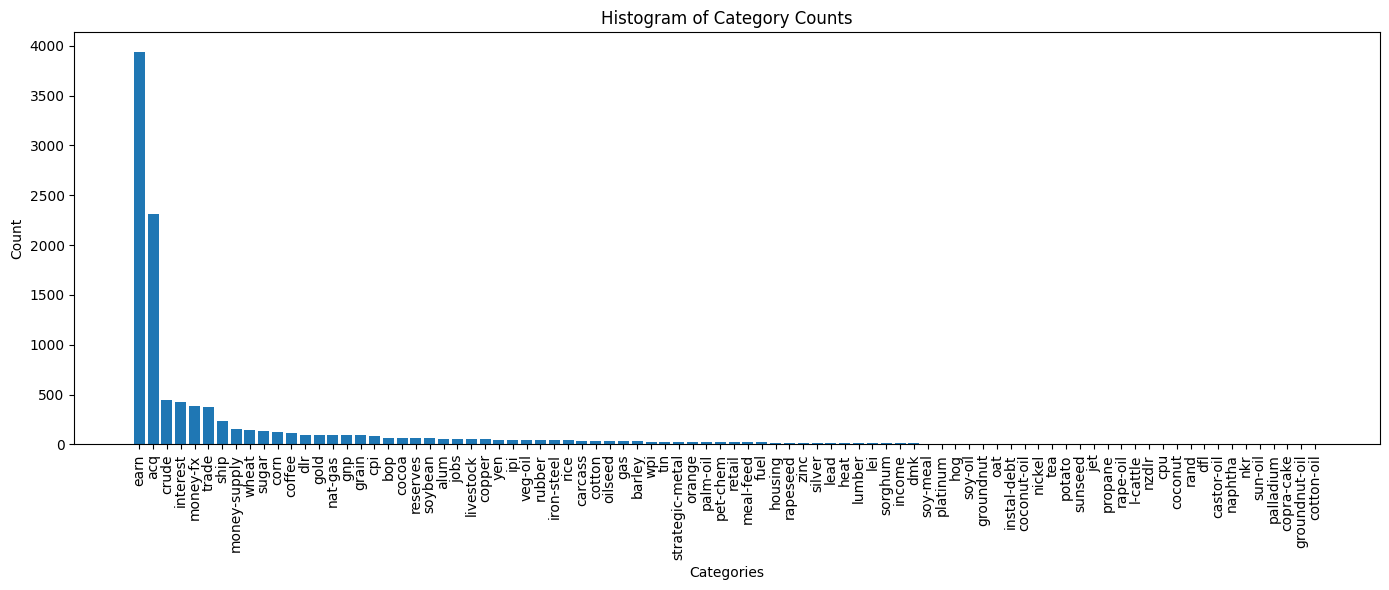

In [266]:
value_counts = df['Category'].value_counts()


plt.figure(figsize=(14, 6))
plt.bar(value_counts.index, value_counts.values)
plt.title('Histogram of Category Counts')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [267]:
print(f"No of Categories: {len(df['Category'].unique())}")

No of Categories: 86


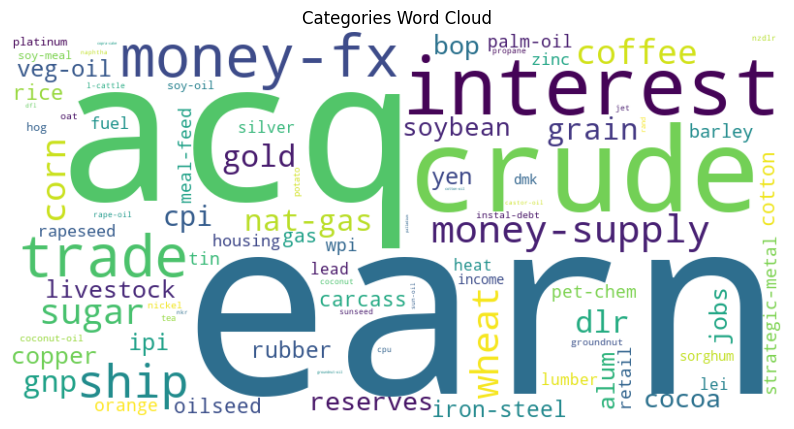

In [268]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(value_counts)

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Categories Word Cloud')
plt.show()

In [269]:
def count_words(text):
    return len(text.split())

In [270]:
df['WordCount'] = df['Text'].apply(count_words)

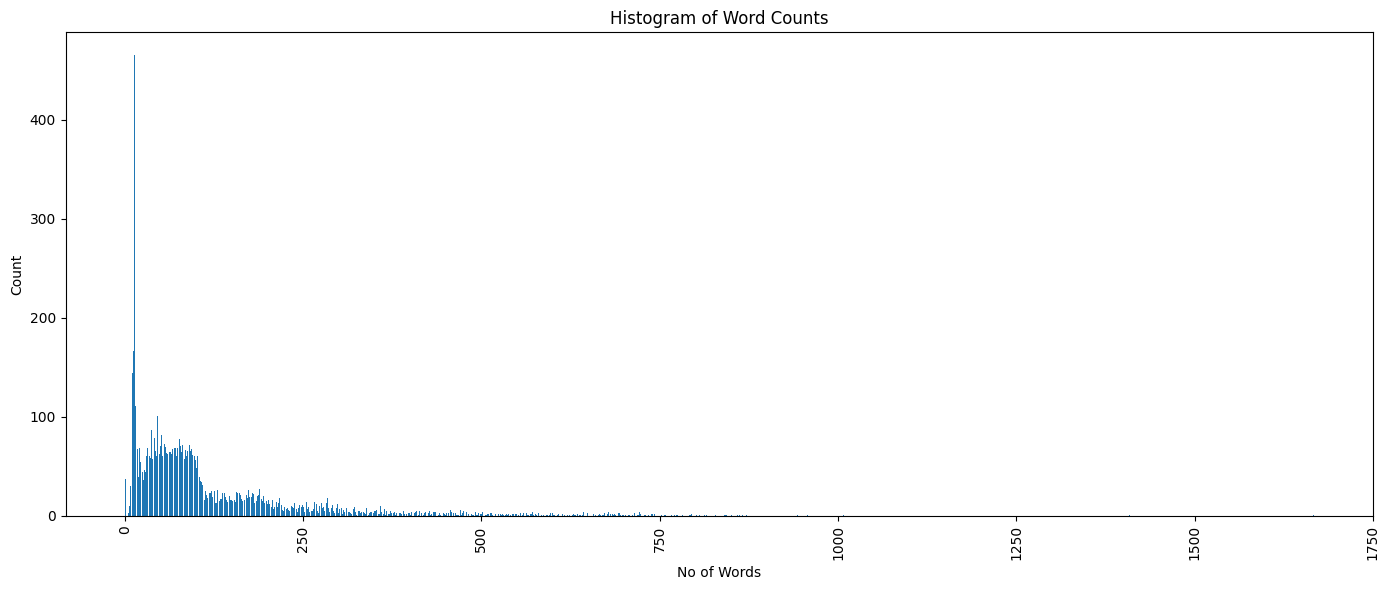

In [271]:
word_counts = df['WordCount'].value_counts()

plt.figure(figsize=(14, 6))
plt.bar(word_counts.index, word_counts.values)
plt.title('Histogram of Word Counts')
plt.xlabel('No of Words')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [272]:
word_counts

WordCount
14     465
13     209
12     166
11     144
16     137
      ... 
628      1
565      1
557      1
719      1
326      1
Name: count, Length: 697, dtype: int64

In [273]:
total_word_count = df['WordCount'].sum()

In [274]:
print(f"Total Word Count: {total_word_count}")

Total Word Count: 1299075


In [275]:
def get_token_count(text):
    words = word_tokenize(text)
    word_count = len(words)

    return word_count

In [276]:
df['TokenCount'] = df['Text'].apply(get_token_count)

In [277]:
total_token_count = df['TokenCount'].sum()

In [278]:
print(f"Total Token Count: {total_token_count}")

Total Token Count: 1446349


In [279]:
#selects the top groups that contribute to 80% of the dataset

total = 0
count = 0
for index,i in enumerate(counts):
    total = total + i
    if total/sum(counts) >= 0.8:
        count = index
        break
    print(i)

3937
2312
442
424
386
377
236
160
149
136


In [280]:
count

10

In [281]:
selected_cats = counts.index.to_list()[:10]

In [282]:
df_80 = df[df['Category'].isin(selected_cats)]

In [283]:
df_80

,Topic,Text,Category,WordCount,TokenCount
0,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT,Mounting trade friction between the U.S. And ...,trade,706,809
5,AUSTRALIAN FOREIGN SHIP BAN ENDS BUT NSW PORTS...,"Tug crews in New South Wales (NSW), Victoria ...",ship,194,217
7,SRI LANKA GETS USDA APPROVAL FOR WHEAT PRICE,Food Department officials said the U.S. Depar...,wheat,46,48
9,SUMITOMO BANK AIMS AT QUICK RECOVERY FROM MERGER,Sumitomo Bank Ltd &lt;SUMI.T> is certain to l...,acq,662,770
11,BUNDESBANK ALLOCATES 6.1 BILLION MARKS IN TENDER,The Bundesbank accepted bids for 6.1 billion ...,interest,251,274
...,...,...,...,...,...
10780,POEHL WARNS AGAINST FURTHER DOLLAR FALL,Bundesbank President Karl Otto Poehl said a w...,money-supply,452,502
10782,Bank of Japan buys dollars shortly after openi...,Bank of Japan buys dollars shortly after open...,money-fx,14,14
10783,BANK OF JAPAN INTERVENES SOON AFTER TOKYO OPENING,The Bank of Japan bought a small amount of do...,money-fx,81,90
10785,SOUTH KOREAN WON FIXED AT 25-MONTH HIGH,THE BANK OF KOREA SAID IT FIXED THE MIDRATE O...,money-fx,54,61


In [285]:
df_80.to_csv("dataset.csv", sep=',', index=False, encoding='utf-8')